# SUMMER ANALYTICS 2021

## WEEK-4 ASSIGNMENT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Let's explore the dataset shall we?
Music conoeisseurs have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.

In this notebook we will go through an in depth analysis of sound and how we can **classify and ultimately understand** it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow! 

**Note**: Pay close attention to the markdown cells and the comments.

In [4]:
# Read the csv file as data
df = pd.read_csv(r"C:\Users\dhchaudhary\Downloads\SA2021_W4_Music.csv")

# you may print first few rows
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455789,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130863e-03,2712.581883,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


#### 0. What is the shape of the dataset?

Expected Output : (9990, 59)

In [6]:
#YOUR CODE HERE
df.shape

(9990, 59)

## Since we now know basic EDA, let's try to visualize this dataset:

1. #### Plot Correlation heatmap for all the mean variables [Columns based on Mean]:



In [8]:
# Cell to plot heatmap. A few lines to get you started.

cols = [col for col in df.columns if 'mean' in col]
corr = df[cols].corr()

In [9]:
df.corr().style.background_gradient(cmap='GnBu')

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
length,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chroma_stft_mean,nan,1.000000,-0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,0.457080,0.278017,0.034305,0.216488,-0.109303,0.417177,0.019084,0.573974,0.054769,-0.513978,0.055816,0.013981,0.121196,0.213522,0.135822,0.069027,0.090913,0.342903,0.121105,0.112848,0.101439,0.423220,0.032791,0.155357,-0.016019,0.376734,-0.067534,0.108459,-0.147130,0.400529,-0.226017,-0.036171,-0.242423,0.297993,-0.265843,-0.078784,-0.270092,0.228293,-0.264815,-0.103968,-0.273841,0.168254,-0.308342,-0.062985,-0.313233,0.193666,-0.363354
chroma_stft_var,nan,-0.443757,1.000000,-0.078410,0.251900,-0.208136,0.276964,-0.031197,0.291007,-0.141792,0.330930,-0.391281,0.138214,-0.010949,0.024139,0.072719,0.000478,-0.004419,-0.296517,0.347460,0.091757,0.326217,0.323529,0.354501,-0.194552,0.333186,0.248247,0.351826,-0.155817,0.363150,0.192922,0.343599,-0.239743,0.352686,0.126653,0.363827,-0.216207,0.337400,0.149261,0.335556,-0.263772,0.302924,0.209318,0.309993,-0.197412,0.283260,0.162830,0.285569,-0.221620,0.296099,0.111544,0.303262,-0.171744,0.295359,0.107008,0.277295,-0.173398,0.287195
rms_mean,nan,0.424706,-0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,0.293745,0.217606,0.065134,0.884846,-0.012401,0.766446,0.015668,0.795000,-0.080320,-0.453606,0.033635,0.136936,0.069158,-0.034473,0.178296,0.122941,0.119419,0.072916,0.212010,0.181207,0.140892,0.134868,0.126329,0.213195,0.087181,0.144650,0.070977,0.133593,-0.012006,0.134779,-0.064247,0.043769,-0.088406,0.113960,-0.080352,0.012184,-0.088842,0.055563,-0.032953,-0.013952,-0.041470,0.087615,-0.046180,0.024552,-0.062662,0.082251,-0.103519
rms_var,nan,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,0.143768,0.453957,0.071193,0.519717,0.100449,0.744850,-0.020418,0.296198,0.336492,-0.351508,0.355515,0.277005,0.376544,-0.215819,0.412464,0.248711,0.359285,-0.134974,0.479166,0.290245,0.356301,-0.110396,0.381793,0.301416,0.332587,-0.058046,0.297938,0.251421,0.227644,-0.066374,0.164785,0.214514,0.161973,-0.026530,0.130442,0.189566,0.116201,-0.064570,0.159390,0.144238,0.144163,-0.004785,0.102019,0.136798,0.095054,0.015085,0.073571
spectral_centroid_mean,nan,0.534670,-0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,0.865487,0.579997,0.050559,0.274194,-0.004654,0.531487,0.002111,0.686196,-0.061331,-0.931435,0.085022,0.195977,0.042125,-0.165793,0.187926,0.078506,0.027291,-0.027122,0.209412,0.196388,0.106182,0.088172,0.118458,0.260035,0.057883,0.146238,0.054746,0.144027,-0.009416,0.118541,-0.064614,0.058537,-0.055983,0.118186,-0.058378,0.035098,-0.064673,0.116866,-0.025006,0.026879,-0.018358,0.177934,-0.006376,0.018651,-0.011018,0.191512,-0.051205
spectral_centroid_var,nan,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,0.242913,0.818348,0.047028,0.192711,0.089544,0.388760,-0.009407,0.159586,0.429485,-0.497158,0.748612,0.513633,0.461658,-0.297699,0.488902,0.406538,0.390078,-0.158945,0.493938,0.391931,0.

2. #### Draw a Countplot for the labels column

<AxesSubplot:xlabel='label', ylabel='count'>

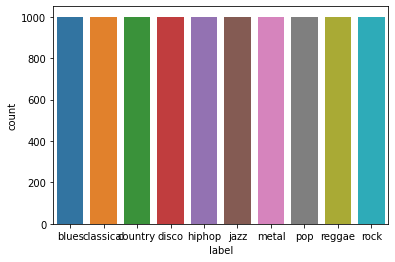

In [12]:
# Cell to plot countplot.
sns.countplot(x="label", data=df)

3. #### Draw a boxplot for the tempo vs labels column. Think carefully about what a boxplot represents.

In [13]:
# Cell to plot boxplot. A few lines to get you started.

data = df[["label", "tempo"]]

<AxesSubplot:xlabel='label', ylabel='tempo'>

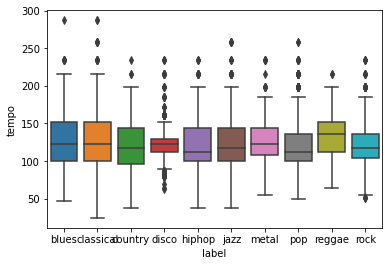

In [14]:
sns.boxplot(x='label', y='tempo', data=df)

<AxesSubplot:xlabel='zero_crossing_rate_var'>

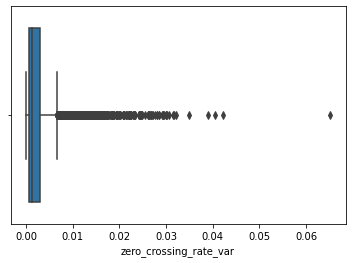

In [39]:
sns.boxplot(x='zero_crossing_rate_var', data=df)

<AxesSubplot:xlabel='perceptr_mean'>

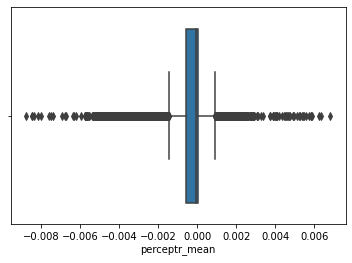

In [41]:
sns.boxplot(x='perceptr_mean', data=df)

<AxesSubplot:xlabel='harmony_mean'>

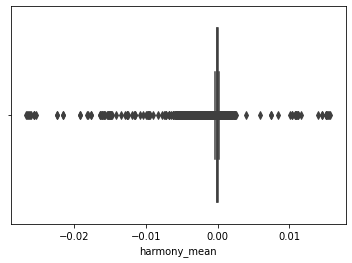

In [43]:
sns.boxplot(x='harmony_mean', data=df)

Again, understand what a boxplot exactly represents. (Outlier analysis)

### Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [15]:
# These are the import statements referred to below:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Documentation of each model. You can refer to there whenever stuck.

GaussianNB: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html <br>
LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br>
XGBoost: https://xgboost.readthedocs.io/en/latest/ <br>
AdaBoostClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html <br>

In [17]:
data = pd.read_csv(r"C:\Users\dhchaudhary\Downloads\SA2021_W4_Music.csv")
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Preprocess the data.

Be careful when you play around with the cell below. Your final outputs depend on this.

In [18]:
# DO NOT EDIT THIS CELL

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape) #Why did the shape change? What happened?

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

SHAPE: (3442, 59)


Also pay attention to the preprocessing step. What did we exactly do?

### Splitting the dataset: Do you know what stratify does?

In [21]:
# DO NOT EDIT THIS CELL

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

### Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [22]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

This function trains/fits the model by itself. Just pass the model as shown below.

### Let's see how a basic Logistic Regressor works on this!

In [23]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.74493 



The accuracy hovers around 74%. Do you think you can beat this? The kaggle microcourses would've surely taught you more than this!

#### Now it's your turn. Train the following: 

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters. Do **NOT** change these values 

In [24]:
# AdaBoostClassifier
#YOUR CODE HERE
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(ada, "Adaboost Classifier")

Accuracy for Adaboost Classifier : 0.32464 



In [27]:
# Random Forest
#YOUR CODE HERE
randomclass = RandomForestClassifier(n_estimators=1000,max_depth=10, random_state=0)
score(randomclass, "Random Classifier")

Accuracy for Random Classifier : 0.84348 



AdaBoost performs poorly, but Random Forest loRandomForestClassifier great!

#### Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.

We suggest going through their documentations before using them.

In [28]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
guassiNB = GaussianNB()
score(guassiNB, "Guassian Classifier")
# KNN: KNeighborsClassifier
#YOUR CODE HERE
knn = KNeighborsClassifier()
score(knn, "Knn Classifier")
# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
decisiontree = DecisionTreeClassifier()
score(decisiontree, "Decision Classifier")

Accuracy for Guassian Classifier : 0.52464 

Accuracy for Knn Classifier : 0.84348 

Accuracy for Decision Classifier : 0.67246 



6. Did you beat the score yet? Chances are you couldn't. Prove us wrong! Use **XGBClassifier** with n_estimators=1000 and learning_rate=0.05

In [29]:
# XGBClassifier
#YOUR CODE HERE
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05 )
score(xgb, "XGB Classifier")

[16:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGB Classifier : 0.87246 



You should've beaten the score by now. Now, heres a task for you. Try **XGBRFClassifier** on your own.

In [30]:
# XGBRFClassifier
#YOUR CODE HERE
xgbrf = XGBRFClassifier()
score(xgbrf, "XGBrf Classifier")

[16:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGBrf Classifier : 0.7913 



In [33]:
from sklearn.metrics import f1_score,plot_confusion_matrix,classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,plot_precision_recall_curve,precision_score,recall_score,roc_auc_score,log_loss


### Till now, it looks like XGBClassifier performs the best. Let's experiment with it a bit more.

7. Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.05

[16:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


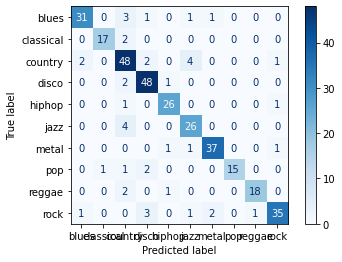

In [35]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05 )
# score(xgb, "XGB Classifier")
xgb.fit(X_train, y_train)
prediction_xgb = xgb.predict(X_test)

plot_confusion_matrix(xgb,X_test, y_test,cmap=plt.cm.Blues)


In [46]:
print(classification_report(y_test, prediction_xgb))


              precision    recall  f1-score   support

       blues       0.91      0.84      0.87        37
   classical       0.94      0.89      0.92        19
     country       0.76      0.84      0.80        57
       disco       0.86      0.94      0.90        51
      hiphop       0.90      0.93      0.91        28
        jazz       0.79      0.87      0.83        30
       metal       0.93      0.93      0.93        40
         pop       1.00      0.79      0.88        19
      reggae       0.95      0.86      0.90        21
        rock       0.92      0.81      0.86        43

    accuracy                           0.87       345
   macro avg       0.90      0.87      0.88       345
weighted avg       0.88      0.87      0.87       345



8. Find the feature importance for XGBClassifier. 

*Hint: It's an inbuilt member variable*

In [38]:
# Cell to find Feature Importance
#YOUR CODE HERE
xgb.feature_importances_

array([0.        , 0.02948353, 0.01440656, 0.01494295, 0.02100901,
       0.03974679, 0.02198863, 0.0378316 , 0.01272493, 0.03094937,
       0.02801523, 0.02153244, 0.00850544, 0.00800135, 0.01871745,
       0.02768949, 0.06020469, 0.02094095, 0.03242388, 0.02745032,
       0.02793575, 0.0066387 , 0.01697588, 0.01753127, 0.03950072,
       0.01634359, 0.02031685, 0.01197333, 0.02137678, 0.0149072 ,
       0.01060991, 0.01552271, 0.01708809, 0.00867456, 0.02981644,
       0.01972997, 0.01201009, 0.01272192, 0.01446473, 0.00561689,
       0.01691741, 0.0094126 , 0.01712395, 0.00678115, 0.01662439,
       0.0060484 , 0.01316827, 0.00663619, 0.00855238, 0.00864051,
       0.01095581, 0.00724298, 0.010663  , 0.00837794, 0.00795487,
       0.00646208, 0.01187191, 0.01024636], dtype=float32)

In [49]:
X_test.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='